In [7]:
import numpy as np
import pandas as pd
patient = pd.read_csv(r"C:\Users\iamte\Downloads\Anorexia.dat", sep = '\s+')
#print(patient.head(3))
diff = patient['after'] - patient["before"]
patient['diff'] = diff
print(patient.loc[patient['therapy'] == 'cb']['diff'].describe()

SyntaxError: unexpected EOF while parsing (1772766653.py, line 7)

In [12]:
import numpy as np
import pandas as pd
patient = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Anorexia.dat', sep = '\s+')
#print(patient.head(3))
diff = patient['after'] - patient["before"]
patient['diff'] = diff
print(patient.loc[patient['therapy'] == 'cb']['diff'].describe())

count    29.000000
mean      3.006897
std       7.308504
min      -9.100000
25%      -0.700000
50%       1.400000
75%       3.900000
max      20.900000
Name: diff, dtype: float64


In [19]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
income = pd.read_csv(r"C:\Users\Lut Lat Aung\Downloads", sep = '\s+')
print(income.head(1))
fit = smf.ols(formula = 'income ~ C(race)', data = income).fit()
print(fit.summary())
sm.stats.anova_lm(fit)


import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(income['income'], income['race'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
post_hoc_res.plot_simultaneous(ylabel = 'race', xlabel = 'mean income difference')
fit2 = smf.ols(formula = 'income ~ C(race) + education', data = income).fit()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Lut Lat Aung\\Downloads'

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import t
Anor = pd.read_csv (r"C:\Users\Lut Lat Aung\Downloads \Anorexia.dat", sep = '\s+')
diff = A nor['after'] - A nor['before']
A nor['diff'] = diff
first = A nor.l oc[A nor['therapy'] == ' cb']['diff']
m1 = first.mean(); n1 = l en(first); s1 = first.std()
first_posterior = t(l oc = m1, scal e = s1/ np.sqrt(n1), df = n1-1)
first_posterior.interv al (0.95)

SyntaxError: invalid syntax (2792234118.py, line 5)

In [3]:
# Income case:
# The recruiter company would like to know the difference between income with race and education.
# Then they decide to randomly collect the data from private employees. Use income.dat to perform the following problem:

# (a)Generate the ANOVA table and the Tukey comparisons of the difference for three type of therapy
# (b)Generate the corresponding ANOVA table

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

income = pd.read_csv("L:\School Work\Statistics", sep= '\s+')
print(income.head(1))
fit = smf.ols(formula = 'income ~ C(race)', data = income).fit()
print(fit.summary())
sm.stats.anova_lm(fit)

# Perform Tukey
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(income['income'], income['race'])
post_hoc_res= comp.tukeyhsd()
print(post_hoc_res.summary())

post_hoc_res.plot_simultaneous(ylabel= 'race', xlabel= 'mean income difference')
fit2 = smf.ols(formula = 'income ~ C(race) + education', data = income).fit()

print(fit2.summary())
sm.stats.anova_lm(fit2, typ=2)


PermissionError: [Errno 13] Permission denied: 'L:\\School Work\\Statistics'

  Gender    isSmoker
0      M      Smoker
1      M      Smoker
2      M  Non-Smoker
3      F  Non-Smoker
4      F      Smoker
isSmoker  Non-Smoker  Smoker
Gender                      
F                 10      10
M                 10      20
isSmoker  Non-Smoker    Smoker
Gender                        
F           0.500000  0.500000
M           0.333333  0.666667
0.3767591178115821


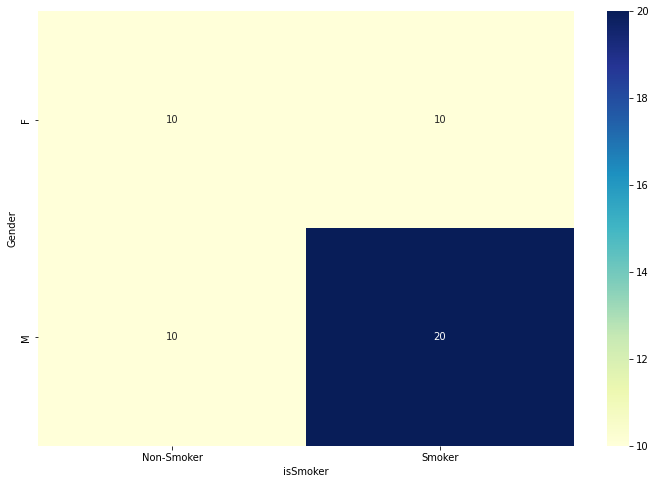

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt

INSPECT = True  # flip to True to see outputs

df = pd.DataFrame({
    'Gender': ['M', 'M', 'M', 'F', 'F', ] * 10,
    'isSmoker': ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'] * 10
})

if INSPECT:
    print(df.head())

# convert data to contingency table
contingency = pd.crosstab(df['Gender'], df['isSmoker'])

if INSPECT:
    print(contingency)

# get percentages by gender
# normalize='columns' -> percentages by column
# normalize='all'     -> total percentage
contingency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index')

if INSPECT:
    print(contingency_pct)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency, annot=True, cmap='YlGnBu')

# chi-square test of independence
c, p, dof, expected = chi2_contingency(contingency)

if INSPECT:
    # print the p-value
    print(p)

# The p-value is 37.67% -> we do not reject the null hypothesis at 95% level of confidence
# The null hypothesis was that `Smokers` and `Gender` are independent
# The contingency table was 2×2, we could have applied z-test for proportions instead of chi-square test
# Chi-square test can be extended to m×n contingency tables



                    Very happy  Pretty happy  Not too happy
Married             301.613445    556.216153     139.170401
Divorced/Separated  144.302521    266.113445      66.584034
Never married       202.084034    372.670401      93.245565
df          4
pvalue      0.0
statistic   197.407019249992


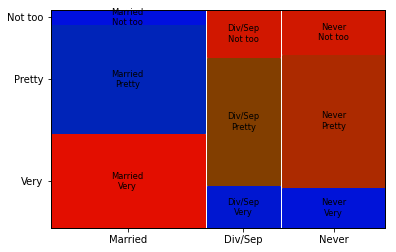

In [5]:
# B.5.2 Chi-Squared Tests Comparing Multiple Proportions in Contin-gency Tables

import numpy as np
import pandas as pd
import matplotlib as plt
Happy = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Happy.dat', sep='\s+')
rowlabel=['Married', 'Divorced/Separated', 'Never married']
collabel=['Very happy', 'Pretty happy', 'Not too happy']
table = pd.crosstab(Happy['marital'], Happy['happiness'], margins = False)
table.index=rowlabel
table.columns=collabel
table # output not shown
# conditional distributions on happiness (proportions within rows):

proptable = pd.crosstab(Happy['marital'], Happy['happiness'], normalize='index')

proptable.index=rowlabel
proptable.columns=collabel
proptable # output not shown

import statsmodels.api as sm # expected frequencies under H0: independence
table = sm.stats.Table(table)
print(table.fittedvalues) # output not shown

X2 = table.test_nominal_association() # chi-squared test of independence
print(X2)

table.standardized_resids # standardized residuals (not shown)
Happy.loc[Happy['happiness'] == 1, 'happiness'] = 'Very'
Happy.loc[Happy['happiness'] == 2, 'happiness'] = 'Pretty'
Happy.loc[Happy['happiness'] == 3, 'happiness'] = 'Not too'
Happy.loc[Happy['marital'] == 1, 'marital'] = 'Married'
Happy.loc[Happy['marital'] == 2, 'marital'] = 'Div/Sep'
Happy.loc[Happy['marital'] == 3, 'marital'] = 'Never'

from statsmodels.graphics.mosaicplot import mosaic
fig, _ = mosaic(Happy, ['marital','happiness'], statistic=True)


In [10]:
# The doctor would like to analyze weight changes of anorexia girls who are undergoing a cognitive behavioral therapy.
# Use anorexia.dat to solve each problem

# (a)Construct 95% confidence interval for the Bayesian population mean change on the first therapy
# (b)Construct 99% confidence interval for the Bayesian population mean change on the third therapy

import numpy as np
import pandas as pd
from scipy.stats import t

Anor= pd.read_csv("C:\Users\Lut Lat Aung\Downloads", sep= '\s+')
diff = Anor['after'] -Anor['before'];
Anor['diff'] = diff
first = Anor.loc[Anor['therapy'] == 'cb']['diff']
m1 = first.mean();
n1 = len(first);
s1 = first.std()
first_posterior = t(loc = m1 , scale = s1/np.sqrt(n1), df= n1-1)
first_posterior.interval(0.95)

import numpy as np
import pandas as pd
from scipy.stats import t

Anor = pd.read_csv("C:\Users\Lut Lat Aung\Downloads", sep = '\s+')
diff = Anor['after'] - Anor['before']
Anor['diff'] = diff
third = Anor.loc[Anor['therapy'] == 'c']['diff']
m3 = third.mean(); n3 = len(third); s3 = third.std()
third_posterior = t(loc = m3, scale = s3/np.sqrt(n3), df = n3-1)
third_posterior.interval(0.99)



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (220423806.py, line 11)

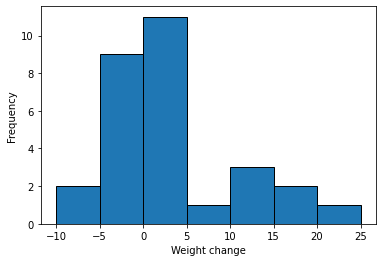

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Anor = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Anorexia.dat', sep='\s+')
Anor.head(3)
change = Anor['after'] - Anor['before']
Anor['change'] = change # add new variable to the data frame
Anor.loc[Anor['therapy'] == 'cb']['change'].describe()
# showing only n and mean and standard deviation of change
bins=list(range(-10,30,5)) # histogram with pre-specified bins:
plt.hist(Anor.loc[Anor['therapy']=='cb']['change'],bins, edgecolor='k')
plt.xlabel('Weight change'); plt.ylabel('Frequency')
changeCB = Anor.loc[Anor['therapy'] == 'cb']['change']
import statsmodels.stats.api as sms
sms.DescrStatsW(changeCB).tconfint_mean() # default alpha=0.05
plt.show()


In [14]:
# Anorexia Case:
# The doctor would like to analyze weight changes of anorexia girls who are undergoing a cognitive behavioral therapy.
# Use anorexia.dat to solve each problem:

# (a)Compute for the first therapy (cb) the mean and standard deviation of changes (differences between before and after)

# (b)Refer to last question, compute 95% confidence interval of mean difference

# (c)Compute 95% confidence interval between the difference of the first therapy and the control group in the experimental study

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

patient= pd.read_csv("L:\School Work\Statistics\Anorexia.dat", sep= '\s+')
print(patient.head(3))
diff = patient['after'] -patient['before'];
patient['diff'] = diff
print(patient.loc[patient['therapy'] == 'cb']['diff'].describe())

diffCB= patient.loc[patient['therapy'] == 'cb']['diff']
import statsmodels.stats.api as sms

# conduct 95% confidence mean change
print(sms.DescrStatsW(diffCB).tconfint_mean())

#conduct 99% confidence mean change
print(sms.DescrStatsW(diffCB).tconfint_mean(alpha = 0.01))



   subject therapy  before  after
0        1      cb    80.5   82.2
1        2      cb    84.9   85.6
2        3      cb    81.5   81.4
count    29.000000
mean      3.006897
std       7.308504
min      -9.100000
25%      -0.700000
50%       1.400000
75%       3.900000
max      20.900000
Name: diff, dtype: float64
(0.22689015835877635, 5.7869029450894995)
(-0.7432794440477521, 6.757072547496028)


[2.57058184 2.00855911 1.96471984 1.96043855]
[0.94638612 0.97223591 0.9747503  0.975     ]


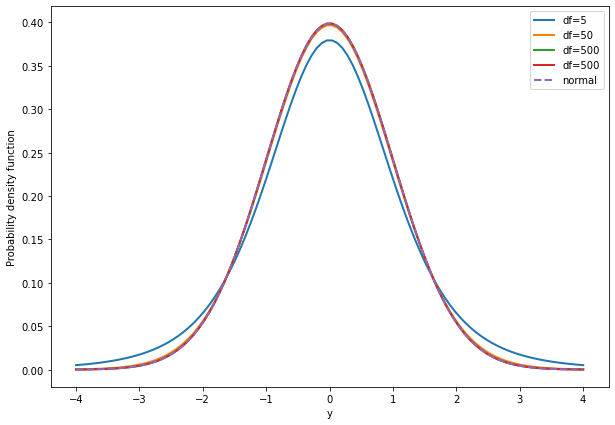

In [18]:
# Assume the data have different degree of freedom values as 5, 50, 500 and 5000

# (a)Construct 0.975 quantile for the given degree of freedom values
# (b)Construct cumulative probabilities for the given degree of freedom values

import numpy as np
df= np.array([5, 50, 500, 5000])
from scipy.stats import t

## construct 0.975 quantile
print(t.ppf(0.975, df))

## construct cumulative probabilities
print(t.cdf(1.96043855, df))

import numpy as np
from scipy.stats import t
from scipy.stats import norm
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pylab as py
# fig, ax = plt.subplots()
df=np.array([5, 50, 500, 5000]) # degrees of freedom
y = np.linspace(-4,4, 100)
def t_pdfs(): # function that creates plot as in Figure 4.5
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    for i in range(4):
        ax.plot(y, t.pdf(y, df[i]), lw=2)
    ax.plot(y, norm.pdf(y), lw=2, linestyle='dashed')
    ax.legend(['df=5','df=50','df=500','df=500','normal'],loc='upper right')
t_pdfs()#run the function
plt.xlabel("y")
plt.ylabel("Probability density function")
plt.show()


